## Oppgavetekst
Lag en lineær modell som predikerer vekt ut fra lengde gitt observasjonene i
length_weight.csv

### Notes

* Use torch.tensor instead of np.array
* Matrix multiplication is done with @
* The reshape() function is used a lot, and lets us convert a table into a specified matrix shape. It can act as transpose


In [163]:
import torch # use torch.tensor instead of np.array
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipympl

In [155]:
data = pd.read_csv("length_weight.csv")

x_train = torch.tensor(data["# length"]).reshape(-1, 1)
y_train = torch.tensor(data["weight"]).reshape(-1, 1)

#print(x_train)

In [156]:
class LinearRegressionModel:

    def __init__(self):
        #Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)
        self.b = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)

    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y) # Bruker heller denne for litt bedre W- og b-verdier
        #return torch.mean(torch.square(self.f(x) - y))

In [157]:
model = LinearRegressionModel()

#Optimize: adjust W and b to minimize loss using Stochastic Gradient Descent(SGD)
optimizer = torch.optim.SGD([model.W, model.b], 0.0001)
for epoch in range(100000):
    model.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    optimizer.zero_grad() #Clear gradients for next step

In [158]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.2043]], dtype=torch.float64, requires_grad=True), b = tensor([[-5.6641]], dtype=torch.float64, requires_grad=True), loss = tensor(1.4416, dtype=torch.float64, grad_fn=<MseLossBackward0>)


tensor([[ 45.0000],
        [109.9000]], dtype=torch.float64)


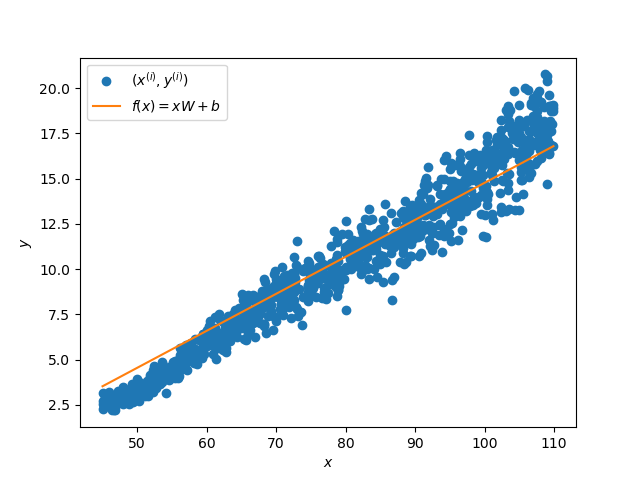

In [164]:
# Visualisering
%matplotlib widget

plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')

plt.xlabel("$x$")
plt.ylabel("$y$")

x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])

print(x)

plt.plot(x, model.f(x).detach(), label='$f(x) = xW+b$')

plt.legend()
plt.show()